<a href="https://colab.research.google.com/github/KimJunGu9/ADP_basic/blob/main/4_3_%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84%2C%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 막대 그래프


# pyplot의 bar() 함수를 사용하여 막대그래프를 그릴 수 있음

# plt.bar(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

# 수평으로 표현된 막대 그래프는 barh() 함수로 그린다

# plt.barh(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
fifa20 = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/1. 데이터 핸들링 (1)/4. 데이터 정렬 (sort_value)/players_20.csv')

In [7]:
fifa20 = fifa20.head(1000)

In [8]:
overall_cnt =fifa20['overall'].value_counts()
preferred_foot_cnt = fifa20['preferred_foot'].value_counts().sort_index()

In [9]:
overall_cnt

78    239
79    185
80    157
82     92
81     82
83     80
84     49
85     35
86     18
88     17
87     15
89     13
77      8
90      4
91      3
93      1
92      1
94      1
Name: overall, dtype: int64

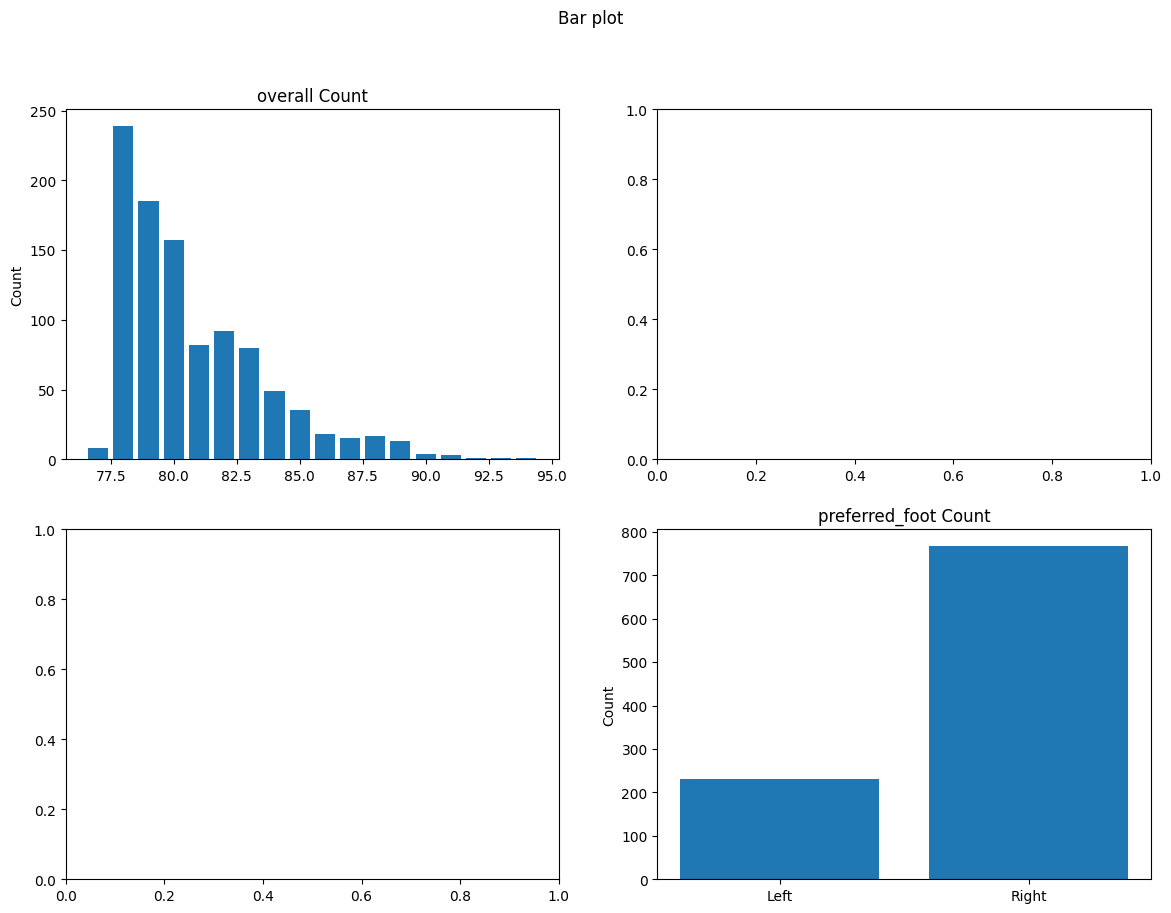

In [10]:
# 두개의 플롯을 그려야 하므로 두 개의 서브플롯을 선언
# fig는 플롯이 나타날 전체 figure, axs[n]은 n번째 서브플롯을 나타냄
fig, axs = plt.subplots(2, 2,figsize=(14,10))
fig.suptitle('Bar plot')

axs[0][0].bar(overall_cnt.index, overall_cnt.values)
axs[0][0].set_title('overall Count')
axs[0][0].set_ylabel('Count')
axs[1][1].bar(preferred_foot_cnt.index, preferred_foot_cnt.values)
axs[1][1].set_title('preferred_foot Count')
axs[1][1].set_ylabel('Count')

plt.show()

In [11]:
# 여러 개의 범주형 변수를 막대그래프에 표현하기

# fifa20 데이터의 overall preferred_foot 변수의 범주별 데이터 개수를 막대그래프로 한 번에 표현하고 범례를 함께 나타내기

In [12]:
table = pd.crosstab(fifa20['overall'], fifa20['preferred_foot'])
table

preferred_foot,Left,Right
overall,,
77,1,7
78,51,188
79,42,143
80,33,124
81,21,61
82,20,72
83,24,56
84,11,38
85,13,22


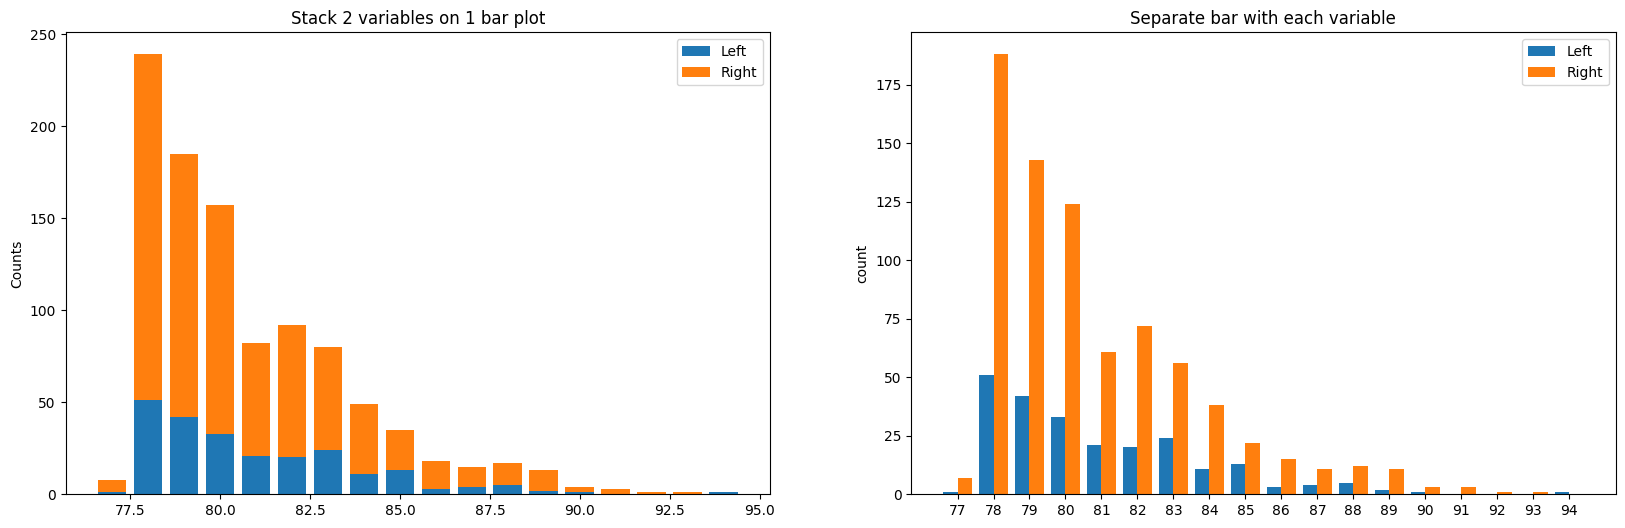

In [13]:
fig, axs = plt.subplots(1,2,figsize=(20,6))


# 두 개의 플롯을 선언하고 그 중 하나에서 bottom 인수를 사용하여 다른 값 아래에 위치하게 함

axs[0].bar(table['Left'].index, table['Left'].values, label='Left')
axs[0].bar(table['Right'].index, table['Right'].values,bottom=table['Left'].values, label='Right')

axs[0].set_ylabel('Counts')
axs[0].set_title('Stack 2 variables on 1 bar plot')
axs[0].legend()

# 범주의 개수(ind)를 세어 플롯의 x 인자에 임시 할당하고 x인자에서 두께를 감산
# 각 bar plot에 두께를 지정

idx = table['Right'].index
ind = np.arange(1, len(idx)+1)
width = 0.4
axs[1].bar(ind - width/2, table['Left'].values, width, label='Left')
axs[1].bar(ind + width/2, table['Right'].values, width, label='Right')
axs[1].set_xticks(ind) # set_xticklabels 호출 이전에 선행해서 호출되어야 함 (눈금 고정)
axs[1].set_xticklabels(idx) # bar 플롯 x축의 범주를 문자열 값으로 변경
axs[1].set_ylabel('count')
axs[1].set_title('Separate bar with each variable')
axs[1].legend()

plt.show()

In [15]:
# 히스토그램

# plt.hist(x, bins=None, range=None, density=False, color=None, data=None)

# bins : 히스토그램의 구간의 개수 정의
# range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언
# density : True이면 확률밀도함수를 그리고 반환

In [16]:
# fifa20 데이터의 wage_eur 변수에 대해 막대 구간의 개수를 지정하지 않은 히스토그램과 구간의 개수를 5로 지정한 히스토그램 그리기

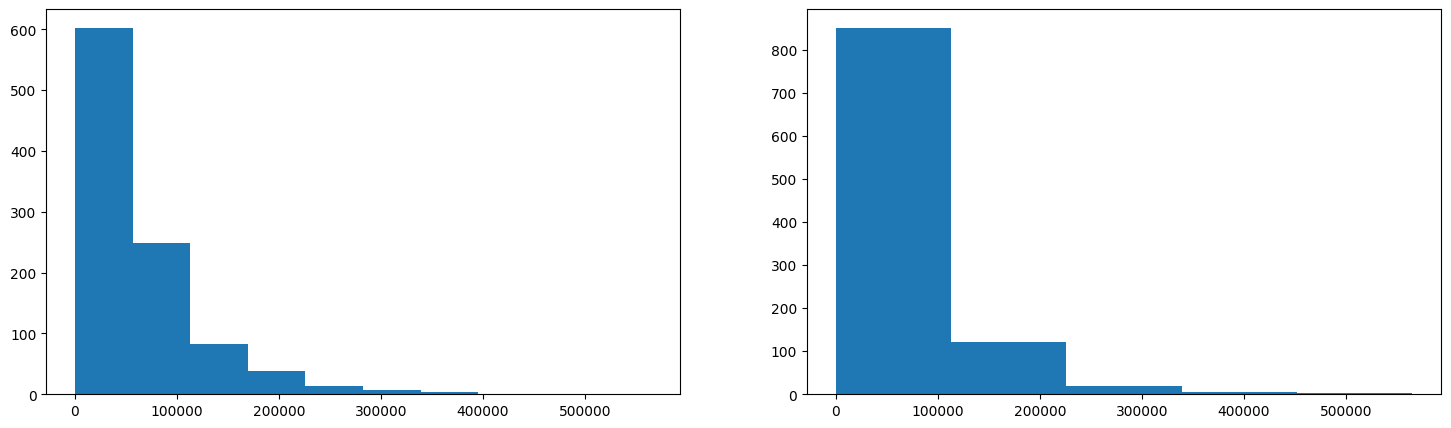

In [17]:
fig, axs = plt.subplots(1,2,figsize=(18,5))

axs[0].hist('wage_eur',data=fifa20)
axs[1].hist('wage_eur',bins=5, data=fifa20)

plt.show()

In [18]:
fifa20[['preferred_foot','height_cm','weight_kg','overall']]

,preferred_foot,height_cm,weight_kg,overall
0,Left,170,72,94
1,Right,187,83,93
2,Right,175,68,92
3,Right,188,87,91
4,Right,175,74,91
...,...,...,...,...
995,Right,177,66,77
996,Right,191,86,77
997,Right,183,78,77
998,Left,183,62,77


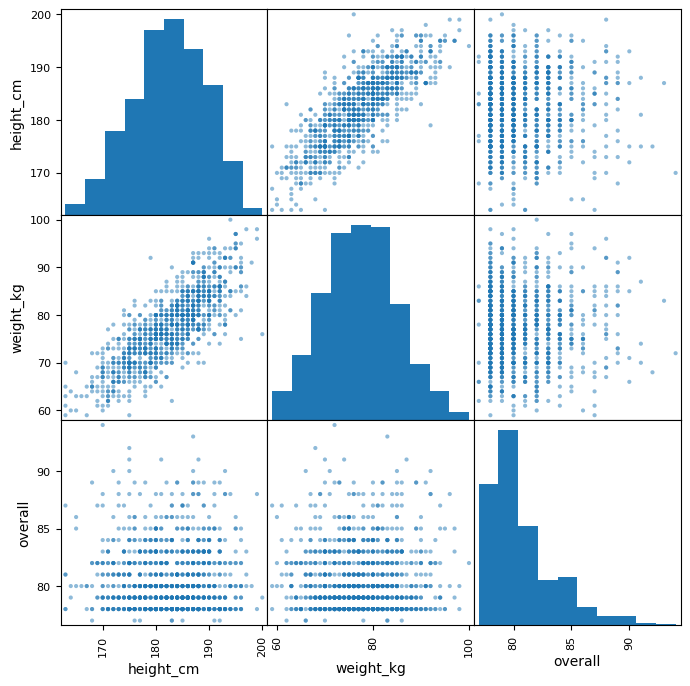

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(fifa20[['preferred_foot','height_cm','weight_kg','overall']], alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()

In [22]:
# matplotlib에서 축과 제목에 한글 사용하기


# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#  # 시스템에서 기본 한글폰트를 가져와 폰트 이름 지정
# rc('font', family=font_name)
#  # rc() 함수에 한글폰트 설정

# malgun : 맑은고딕
# REFSAN : 산세리프 (한글 폰트로 변환 후 에러가 발생할 때 다시 바꿔줌)